In [1]:
from netCDF4 import Dataset

In [32]:
# load the differenced NetCDF for WY2012 (20121001_00:00 - 20110930_11:00)
tmp = Dataset('/Volumes/data/wrf/wrf2d_d01_wy2012_diff_crop.nc','r')

In [34]:
# metadata for UDROFF
tmp.variables['UDROFF']

<type 'netCDF4._netCDF4.Variable'>
float32 UDROFF(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: UNDERGROUND RUNOFF
    units: mm
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 351, 246)
filling on, default _FillValue of 9.96920996839e+36 used

In [36]:
# metadata for SFROFF
tmp.variables['SFROFF']

<type 'netCDF4._netCDF4.Variable'>
float32 SFROFF(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: SURFACE RUNOFF
    units: mm
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 351, 246)
filling on, default _FillValue of 9.96920996839e+36 used

In [31]:
# metadata for PREC_ACC_NC
Dataset('/Volumes/data/wrf/precip/monthly/wrf2d_d01_monthly_total_201110_crop.nc','r').variables['PREC_ACC_NC']

<type 'netCDF4._netCDF4.Variable'>
float32 PREC_ACC_NC(Time, south_north, west_east)
    sum_op_ncl: dim_sum_n over dimension(s): Time
    FieldType: 104
    MemoryOrder: XY 
    description: ACCUMULATED GRID SCALE  PRECIPITATION OVER prec_acc_dt PERIODS OF TIME
    units: mm
    stagger: 
    coordinates: XLONG XLAT
    _FillValue: 9.96921e+36
    cell_methods: Time: sum
unlimited dimensions: Time
current shape = (1, 351, 246)
filling on

In [13]:
UDROFF = np.array(tmp.variables['UDROFF'])
SFROFF = np.array(tmp.variables['SFROFF'])

In [21]:
Q = UDROFF[0] + SFROFF[0]

In [26]:
# sum monthly precipitation
months = ['201111','201112','201201','201202','201203','201204','201205','201206','201207','201208','201209']

# grab the first month to initialize the grid
PREC_ACC_NC = np.array(Dataset('/Volumes/data/wrf/precip/monthly/wrf2d_d01_monthly_total_201110_crop.nc','r').variables['PREC_ACC_NC'])[0]

# loop through remaining months
for month in months:
    PREC_ACC_NC += np.array(Dataset('/Volumes/data/wrf/precip/monthly/wrf2d_d01_monthly_total_%s_crop.nc'%month,'r').variables['PREC_ACC_NC'])[0]


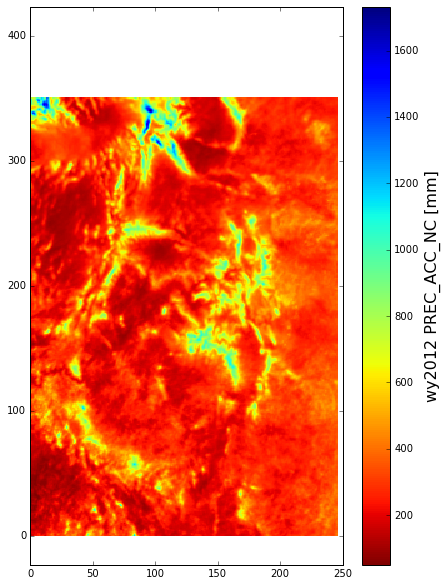

In [44]:
plt.figure(figsize=[7,10])
plt.pcolormesh(PREC_ACC_NC,cmap='jet_r')
plt.axis('equal')
cb = plt.colorbar()
cb.set_label('wy2012 PREC_ACC_NC [mm]',fontsize=16)

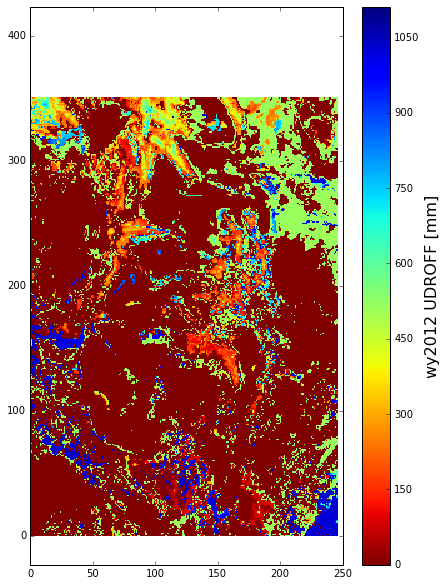

In [45]:
plt.figure(figsize=[7,10])
plt.pcolormesh(UDROFF[0],cmap='jet_r')
plt.axis('equal')
cb = plt.colorbar()
cb.set_label('wy2012 UDROFF [mm]',fontsize=16)

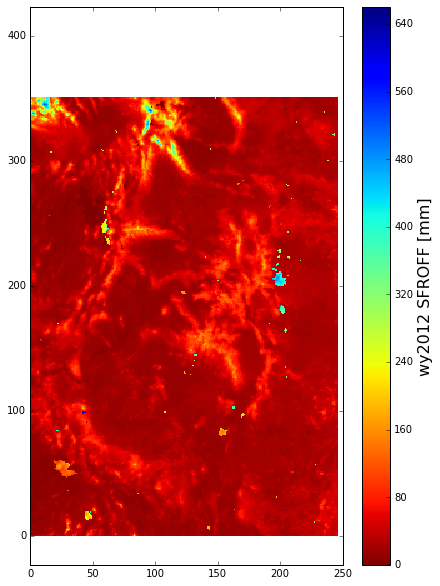

In [46]:
plt.figure(figsize=[7,10])
plt.pcolormesh(SFROFF[0],cmap='jet_r')
plt.axis('equal')
cb = plt.colorbar()
cb.set_label('wy2012 SFROFF [mm]',fontsize=16)

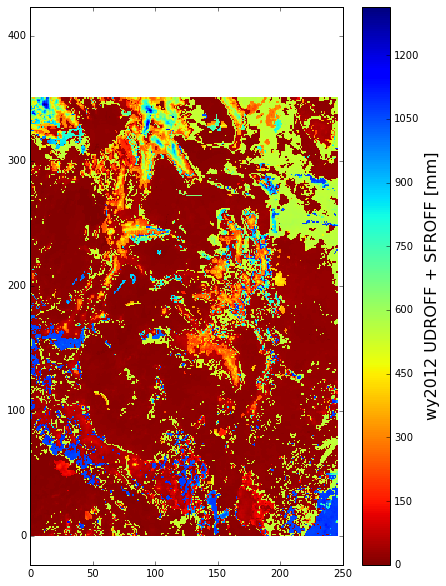

In [47]:
plt.figure(figsize=[7,10])
plt.pcolormesh(Q,cmap='jet_r')
plt.axis('equal')
cb = plt.colorbar()
cb.set_label('wy2012 UDROFF + SFROFF [mm]',fontsize=16)

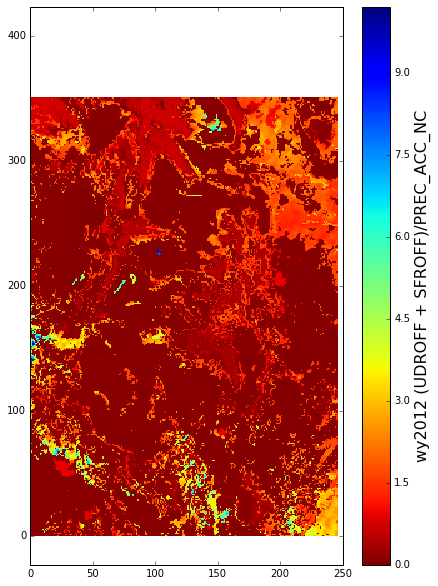

In [51]:
plt.figure(figsize=[7,10])
plt.pcolormesh(Q/PREC_ACC_NC,cmap='jet_r')
plt.axis('equal')
cb = plt.colorbar()
cb.set_label('wy2012 (UDROFF + SFROFF)/PREC_ACC_NC',fontsize=16)

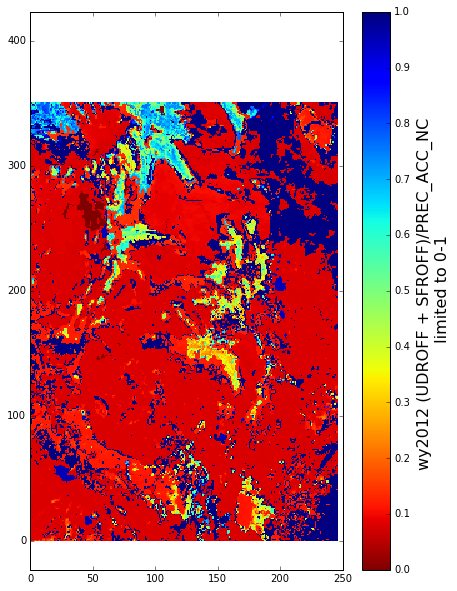

In [52]:
plt.figure(figsize=[7,10])
plt.pcolormesh(Q/PREC_ACC_NC,vmin=0,vmax=1,cmap='jet_r')
plt.axis('equal')
cb = plt.colorbar()
cb.set_label('wy2012 (UDROFF + SFROFF)/PREC_ACC_NC \n limited to 0-1',fontsize=16)